First few rows of the dataset:
   Unnamed: 0  id   age  gender  income  days_on_platform           city  \
0           0   0   NaN    Male  126895              14.0  San Francisco   
1           1   1   NaN    Male  161474              14.0          Tokyo   
2           2   2  24.0    Male  104723              34.0         London   
3           3   3  29.0    Male   43791              28.0         London   
4           4   4  18.0  Female  132181              26.0         London   

   purchases  
0          0  
1          0  
2          1  
3          2  
4          2  

Variables in the dataset:
Index(['Unnamed: 0', 'id', 'age', 'gender', 'income', 'days_on_platform',
       'city', 'purchases'],
      dtype='object')

Missing values in each variable:
Unnamed: 0             0
id                     0
age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64

Missing values after i

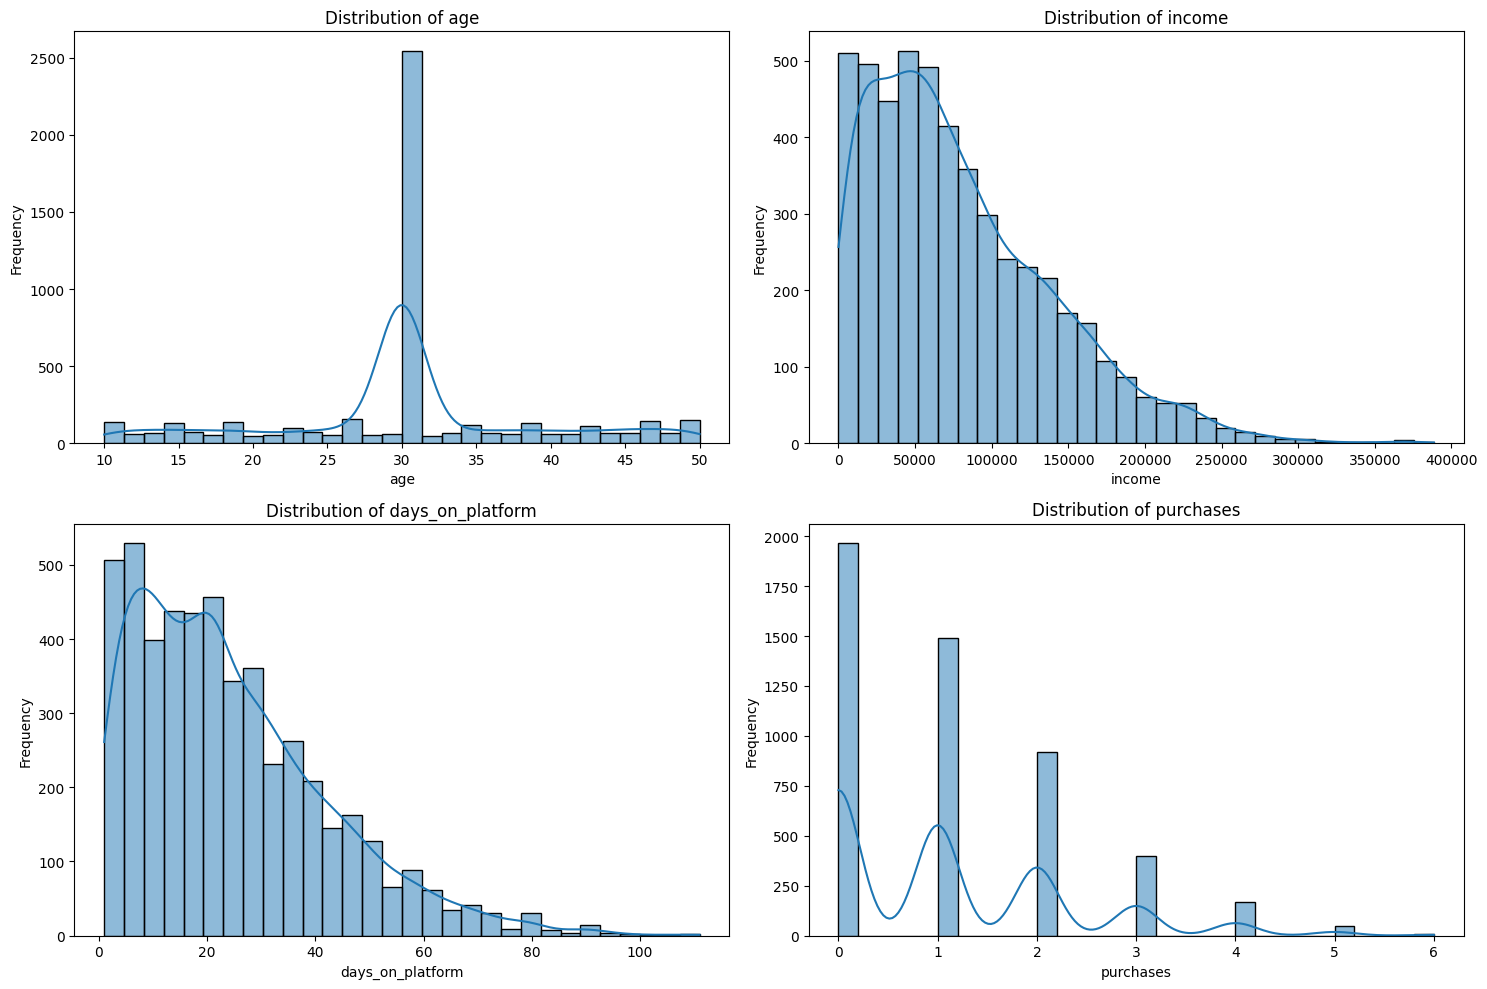


First few rows of log-transformed data:
        age     income  days_on_platform  purchases
0  3.465736  11.751131          2.772589   0.693147
1  3.465736  11.992112          2.772589   0.693147
2  3.258097  11.559093          3.583519   1.098612
3  3.433987  10.687229          3.401197   1.386294
4  2.995732  11.791943          3.332205   1.386294


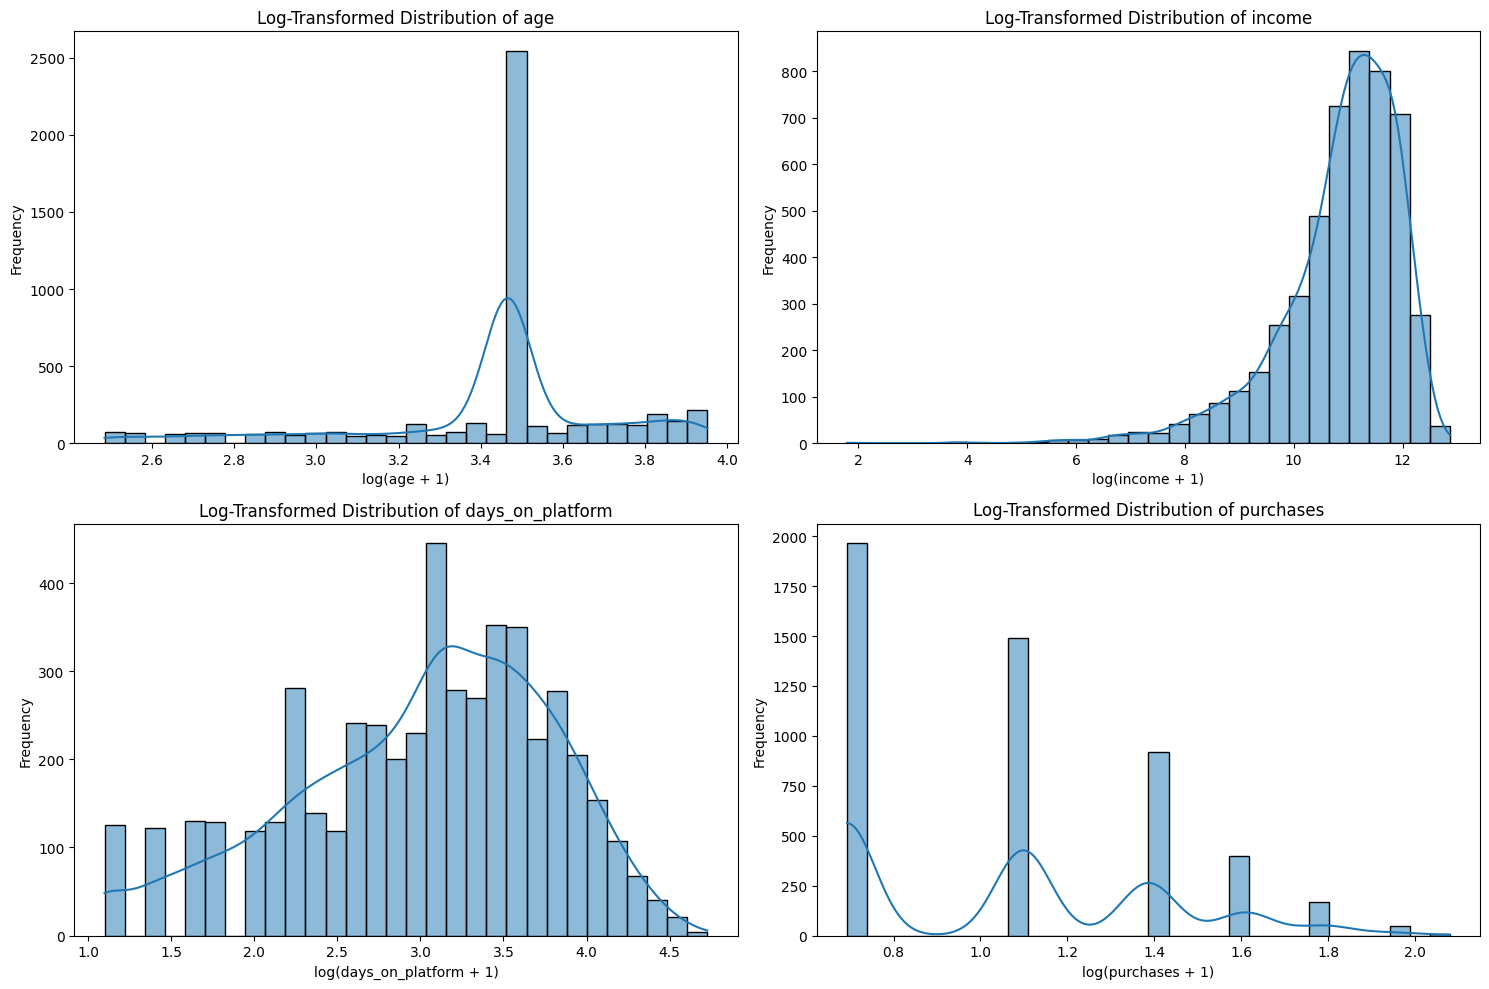


Shapiro-Wilk Test for Normality:
age: Statistic=0.842, p-value=0.000 (not normal)
income: Statistic=0.892, p-value=0.000 (not normal)
days_on_platform: Statistic=0.970, p-value=0.000 (not normal)
purchases: Statistic=0.853, p-value=0.000 (not normal)

Correlation matrix:
                       age    income  days_on_platform  purchases
age               1.000000  0.019973          0.018585  -0.007483
income            0.019973  1.000000          0.001104   0.004064
days_on_platform  0.018585  0.001104          1.000000   0.000712
purchases        -0.007483  0.004064          0.000712   1.000000


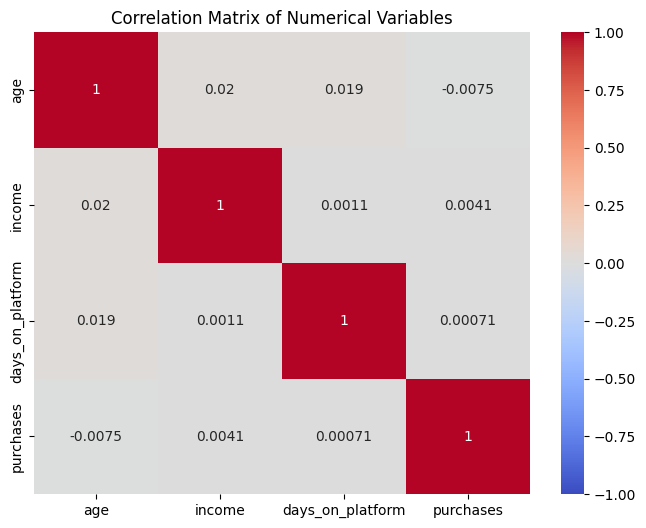


Dataset sizes:
Training set: 3500 samples
Validation set: 750 samples
Test set: 750 samples


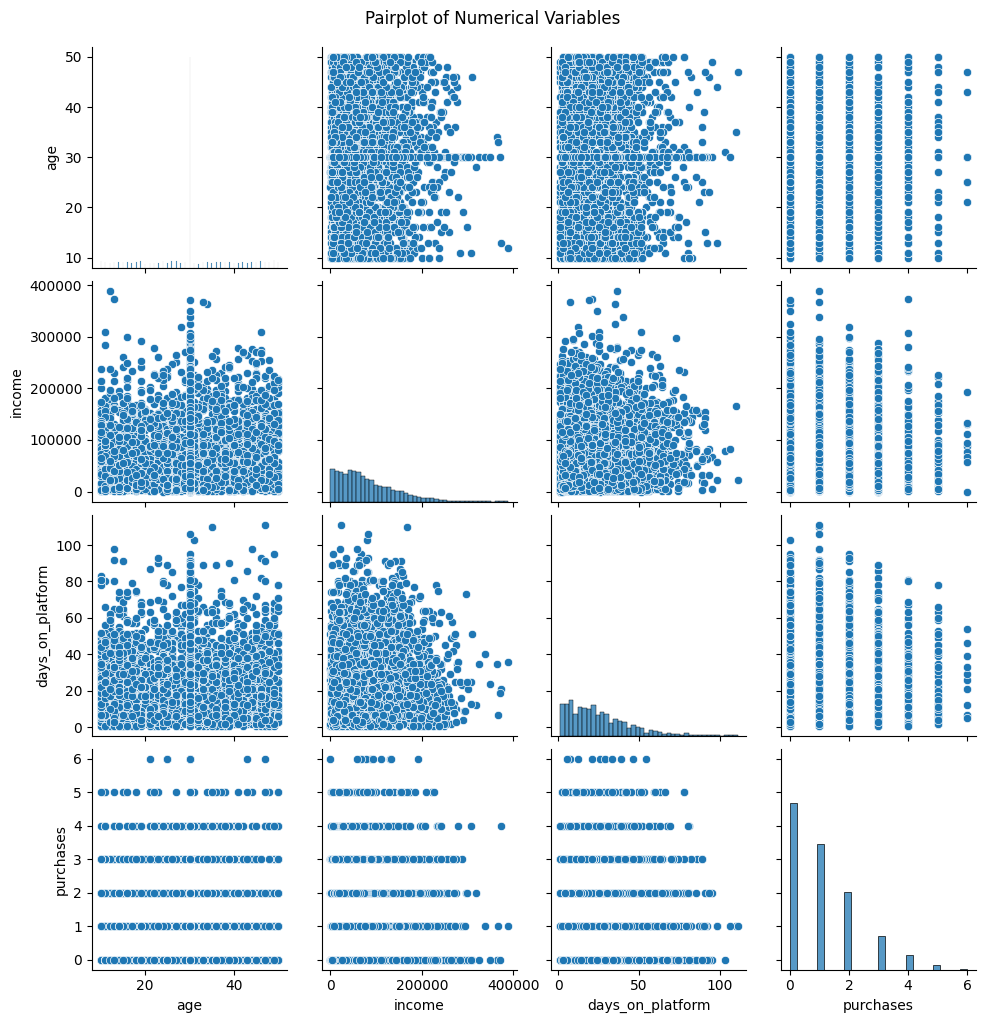

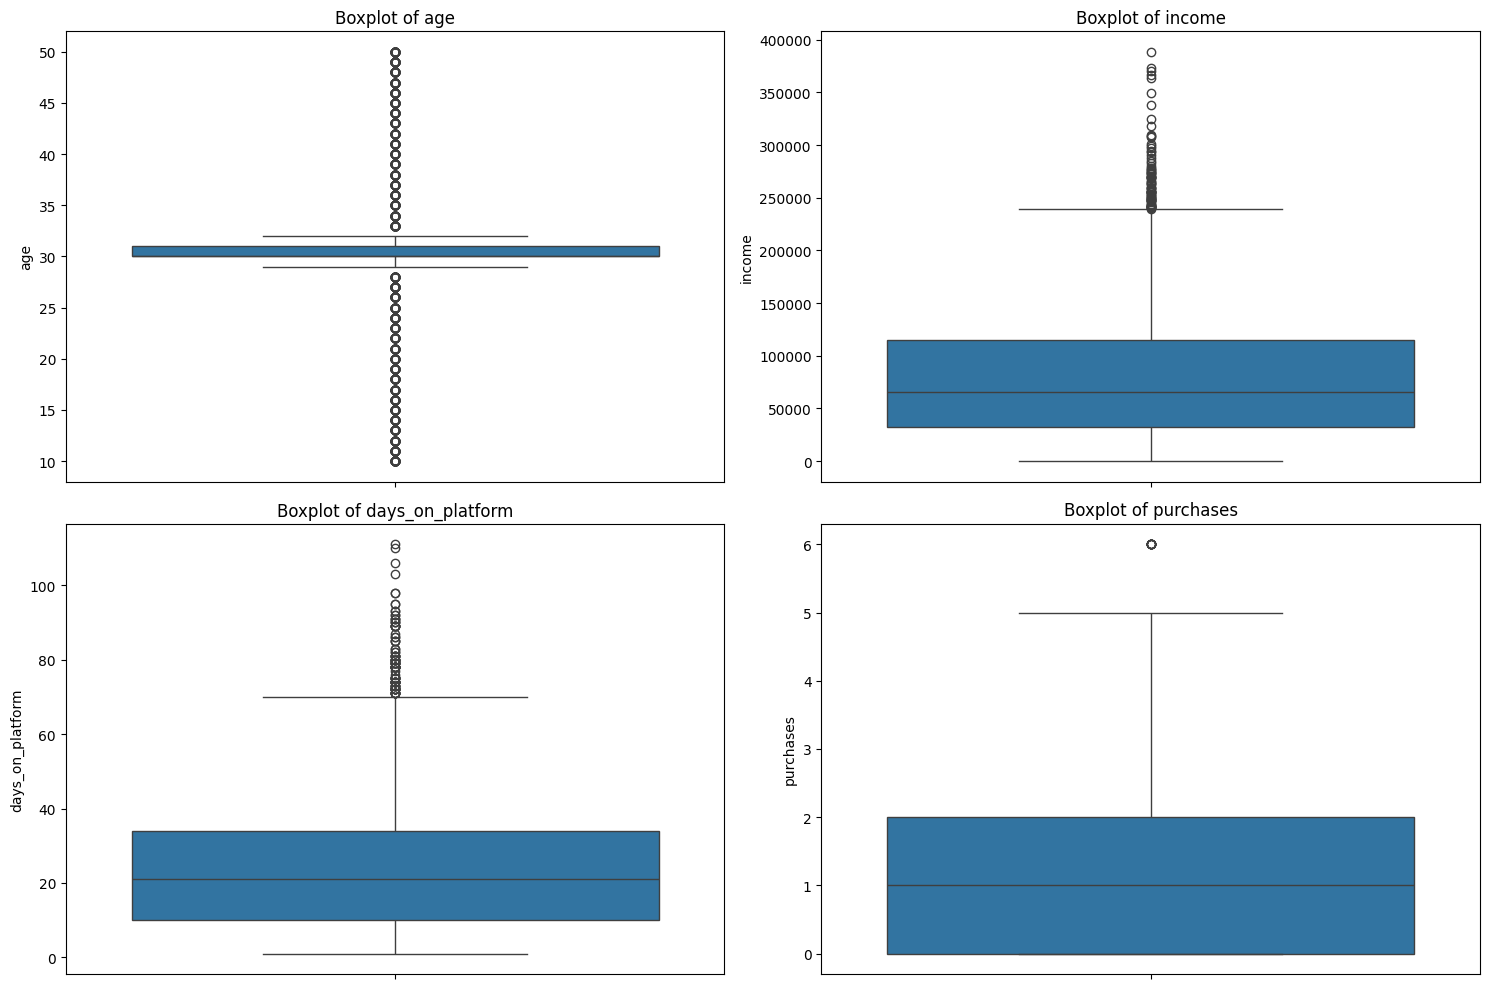

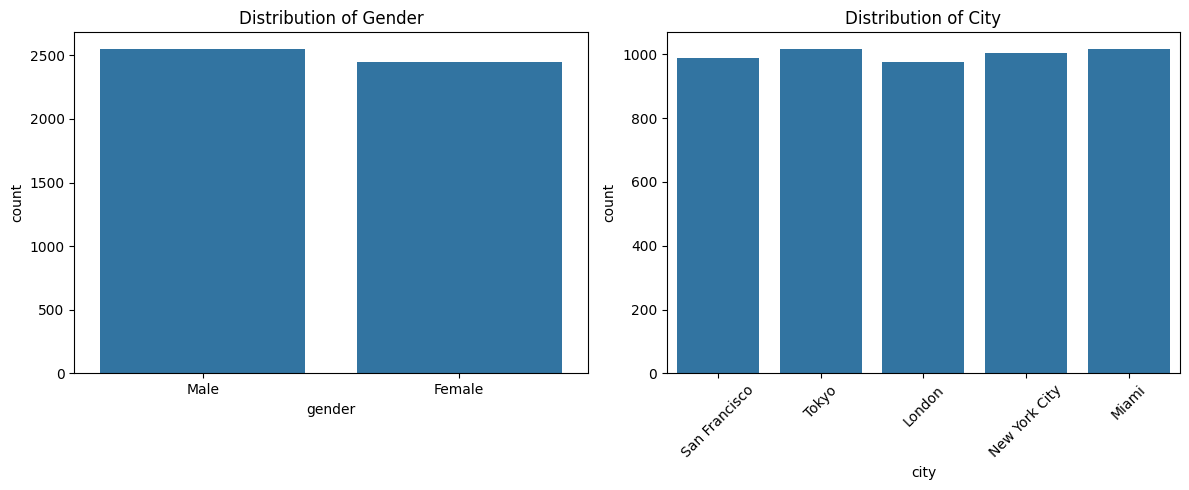

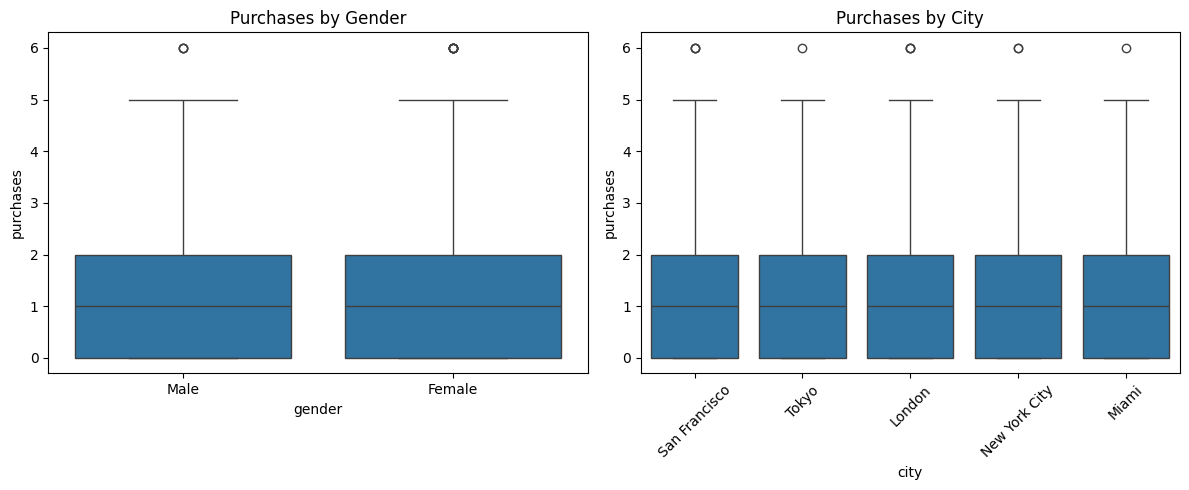

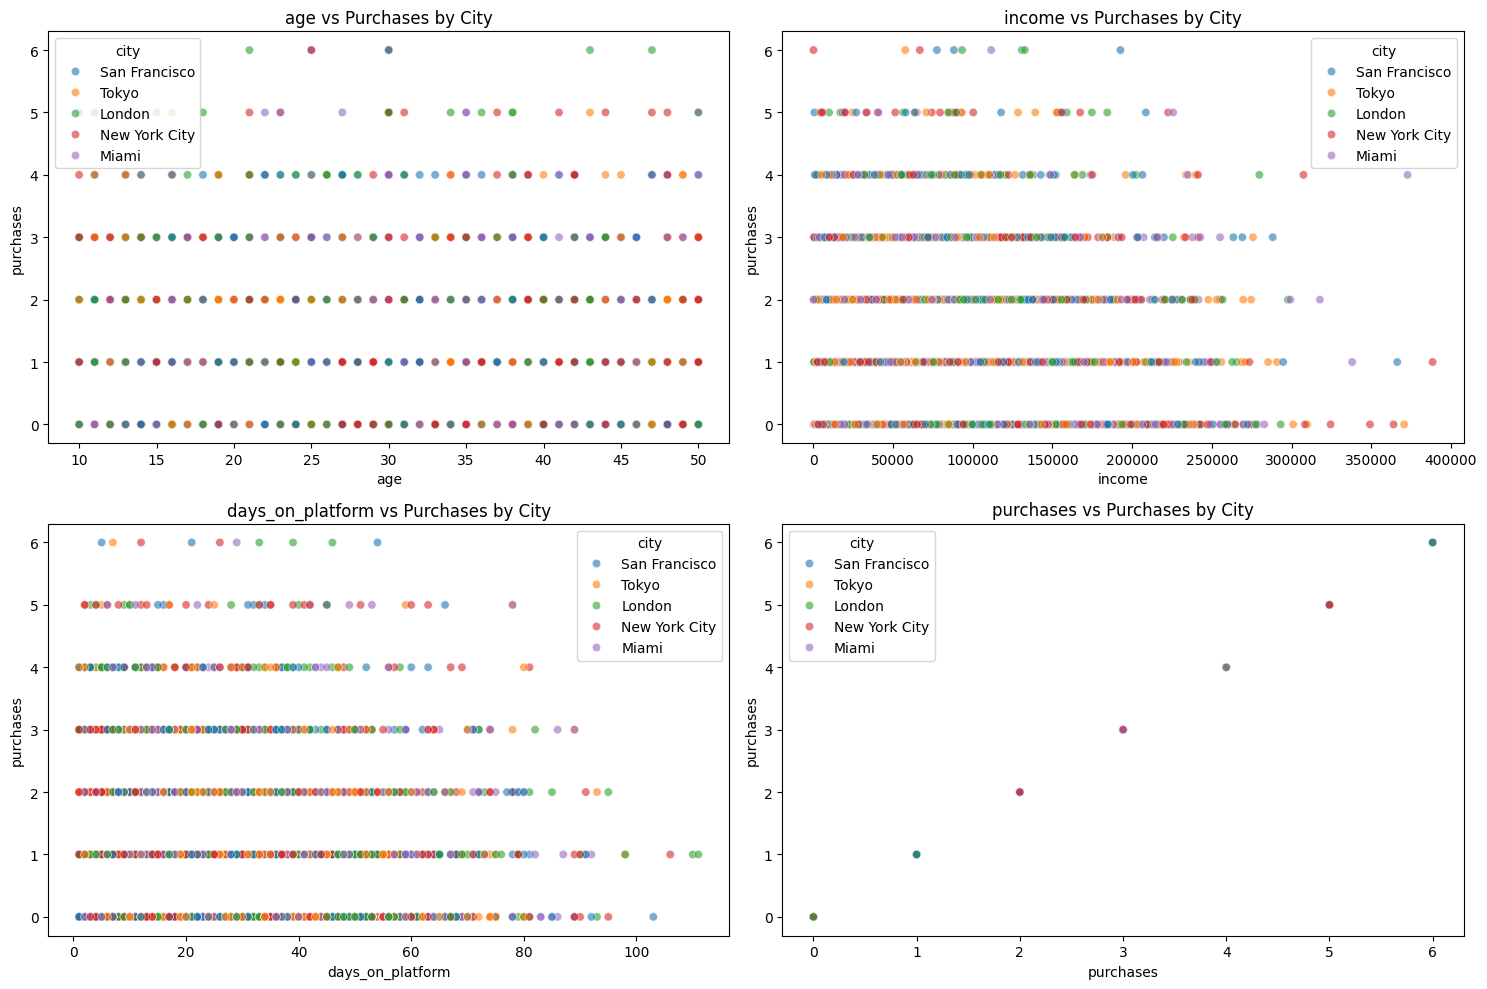

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 1. Read the CSV file
# Since the data is provided as text, we'll load it directly into a DataFrame
# In Google Colab, you can upload the file or read it from a URL if hosted
data = pd.read_csv('/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/CLV Data.csv')  # Replace with file path if uploaded to Colab

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# 2. Identify variables and check for missing values
print("\nVariables in the dataset:")
print(data.columns)

print("\nMissing values in each variable:")
print(data.isnull().sum())

# 3. Impute missing values with mean/median
# For numerical variables: age, days_on_platform
# We'll use median for robustness against outliers
data['age'] = data['age'].fillna(data['age'].median())
data['days_on_platform'] = data['days_on_platform'].fillna(data['days_on_platform'].median())

# Verify imputation
print("\nMissing values after imputation:")
print(data.isnull().sum())

# 4. Compute Kurtosis and Skewness
numerical_vars = ['age', 'income', 'days_on_platform', 'purchases']
kurtosis_values = data[numerical_vars].apply(kurtosis, nan_policy='omit')
skewness_values = data[numerical_vars].apply(skew, nan_policy='omit')

print("\nKurtosis of numerical variables:")
print(kurtosis_values)
print("\nSkewness of numerical variables:")
print(skewness_values)

# Interpretation
print("\nInterpretation of Kurtosis and Skewness:")
for var in numerical_vars:
    kurt = kurtosis_values[var]
    skw = skewness_values[var]
    print(f"{var}:")
    print(f"  Kurtosis: {kurt:.2f} ({'leptokurtic' if kurt > 0 else 'platykurtic' if kurt < 0 else 'mesokurtic'})")
    print(f"  Skewness: {skw:.2f} ({'right-skewed' if skw > 0 else 'left-skewed' if skw < 0 else 'symmetric'})")

# 5. Summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
print(data[numerical_vars].describe())

# 6. Plot distributions of numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 7. Transform numerical variables into natural log
# Add a small constant to avoid log(0) issues
data_log = data[numerical_vars].copy()
for var in numerical_vars:
    data_log[var] = np.log1p(data_log[var] + 1)  # log1p handles log(0) gracefully

print("\nFirst few rows of log-transformed data:")
print(data_log.head())

# Plot distributions of log-transformed variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_log[var], kde=True, bins=30)
    plt.title(f'Log-Transformed Distribution of {var}')
    plt.xlabel(f'log({var} + 1)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 8. Check normality using Shapiro-Wilk test
print("\nShapiro-Wilk Test for Normality:")
for var in numerical_vars:
    stat, p = shapiro(data_log[var].dropna())
    print(f"{var}: Statistic={stat:.3f}, p-value={p:.3f} ({'normal' if p > 0.05 else 'not normal'})")

# 9. Correlation matrix and heatmap
correlation_matrix = data[numerical_vars].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 10. Partition the data into 70-15-15 (train-validation-test)
X = data.drop(columns=['id'])  # Exclude 'id' as it's not a feature
y = data['purchases']  # Assuming 'purchases' is the target variable

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Second split: 50% of temp (15% of total) for validation, 50% for test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nDataset sizes:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 11. Additional Data Exploration & Visualization

# a. Pairplot for numerical variables
sns.pairplot(data[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# b. Boxplot to identify outliers
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# c. Categorical variable analysis: Gender and City distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.subplot(1, 2, 2)
sns.countplot(x='city', data=data)
plt.title('Distribution of City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# d. Purchases by Gender and City
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='purchases', data=data)
plt.title('Purchases by Gender')
plt.subplot(1, 2, 2)
sns.boxplot(x='city', y='purchases', data=data)
plt.title('Purchases by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# e. Correlation of numerical variables with purchases by city
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[var], y=data['purchases'], hue=data['city'], alpha=0.6)
    plt.title(f'{var} vs Purchases by City')
plt.tight_layout()
plt.show()